# **Project Name**    - Exploratory Data Analysis of Amazon Prime Videos



# **Project Summary -**

This Exploratory Data Analysis examines Amazon Prime Video’s content library, including both movies and TV shows, to uncover trends, distributions, and relationships across genres, ratings, and release timelines. The project merges two datasets—titles and credits—to create an enriched dataset with fields such as type, release year, genre, runtime, IMDb/TMDB scores, votes, age certification, production country, and more.

Data Cleaning & Preparation:

Duplicate and mostly empty columns were removed. Missing values in fields such as ratings or cast were imputed with "Unknown" or most common values. Multi-valued fields such as genres and production_countries were parsed into lists and expanded for granular analysis.

Analysis & Visual Insights: 

Content Mix: Approximately 80% movies vs 20% TV shows.

Genre Trends: Drama, Comedy, and Suspense dominate.

Release Patterns: Sharp growth in titles post-2010.

Scoring Trends: Median IMDb rating scores moderately correlated with TMDB and IMDb votes.

Engagement: TV shows with more seasons tend to receive higher ratings.

Regional Distribution: U.S. leads production, followed by India and the UK.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

• Content Diversity: What genres and categories dominate the platform?

• Regional Availability: How does content distribution vary across different regions?

• Trends Over Time: How has Amazon Prime's content library evolved?

• IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?


#### **Define Your Business Objective?**

The purpose of this exploratory analysis is to empower Amazon Prime Video decision‑makers by uncovering key insights into the platform’s content catalog—covering genre mix, regional coverage, release trends, and the alignment between ratings (IMDb score) and audience popularity (votes, TMDB score). By clarifying content diversity, identifying dominant and underrepresented genres, tracking growth over time, and revealing top‑rated and most popular titles, stakeholders can optimize content acquisition, improve recommendation targeting, and refine regional and genre-based marketing strategies.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***


Dataset Description:

This data set was created to list all shows available on Amazon Prime streaming, and analyze the data to interesting facts. This dataset has data available in the United States.

This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

This dataset contains +9k unique titles on Amazon Prime with 19 columns containing their information, including:

id: The title ID on JustWatch.

title: The name of the title.

show_type: TV show or movie.

description: A brief description.

release_year: The release year.

age_certification: The age certification.

runtime: The length of the episode (SHOW) or movie.

production countries: A list of countries that produced the title.

seasons: Number of seasons if it's a SHOW.

imdb_id: The title ID on IMDB.

imdb_score: Score on IMDB.

imdb_votes: Votes on IMDB.

tmdb popularity: Popularity on TMDB.

tmdb_score: Score on TMDB.

And over +124k credits of actors and directors on Amazon Prime titles with 5 columns containing their information:

person_ID: The person ID on JustWatch.

id: The title ID on JustWatch.

name: The actor or director's name.

character_name: The character name.

role: ACTOR or DIRECTOR.

### Import Libraries

In [16]:
# Import Libraries
# Core Libraries
import pandas as pd                  # Data loading & manipulation
import numpy as np                   # Numerical computing

# Visualization Libraries
import matplotlib.pyplot as plt     # Basic plotting
import seaborn as sns               # Statistical graphics
import plotly.express as px         # Interactive visualizations

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [17]:
# Load Dataset
df1 = pd.read_csv(r'C:\Users\WINDOW 11 PRO\Downloads\credits.csv.zip')
df2 = pd.read_csv(r'C:\Users\WINDOW 11 PRO\Downloads\titles.csv.zip')

### Dataset First View

In [18]:
# Dataset First Look
print(df1.columns.tolist())
print(df2.columns.tolist())

['person_id', 'id', 'name', 'character', 'role']
['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']


### Dataset Rows & Columns count

In [19]:
# Merge two data set on common key (e.g., 'id')
dataset=pd.merge(df1,df2, on='id')

In [20]:
# lets print the merged data
dataset

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124342,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124343,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124344,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124345,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


In [21]:
# Dataset Rows & Columns count
print(dataset.shape)

(124347, 19)


### Dataset Information

In [24]:
# Dataset Info
dataset.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   character             108040 non-null  object 
 4   role                  124347 non-null  object 
 5   title                 124347 non-null  object 
 6   type                  124347 non-null  object 
 7   description           124256 non-null  object 
 8   release_year          124347 non-null  int64  
 9   age_certification     56707 non-null   object 
 10  runtime               124347 non-null  int64  
 11  genres                124347 non-null  object 
 12  production_countries  124347 non-null  object 
 13  seasons               8153 non-null    float64
 14  imdb_id               119044 non-null  object 
 15  

#### Duplicate Values

In [25]:
# Dataset Duplicate Value Count
duplicate_count = dataset.duplicated().sum()
print(f"Duplicate rows : {duplicate_count}")

Duplicate rows : 168


#### Missing Values/Null Values

In [26]:
# Missing Values/Null Values Count
missing_values = dataset.isnull().sum()
print(missing_values)

person_id                    0
id                           0
name                         0
character                16307
role                         0
title                        0
type                         0
description                 91
release_year                 0
age_certification        67640
runtime                      0
genres                       0
production_countries         0
seasons                 116194
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10265
dtype: int64


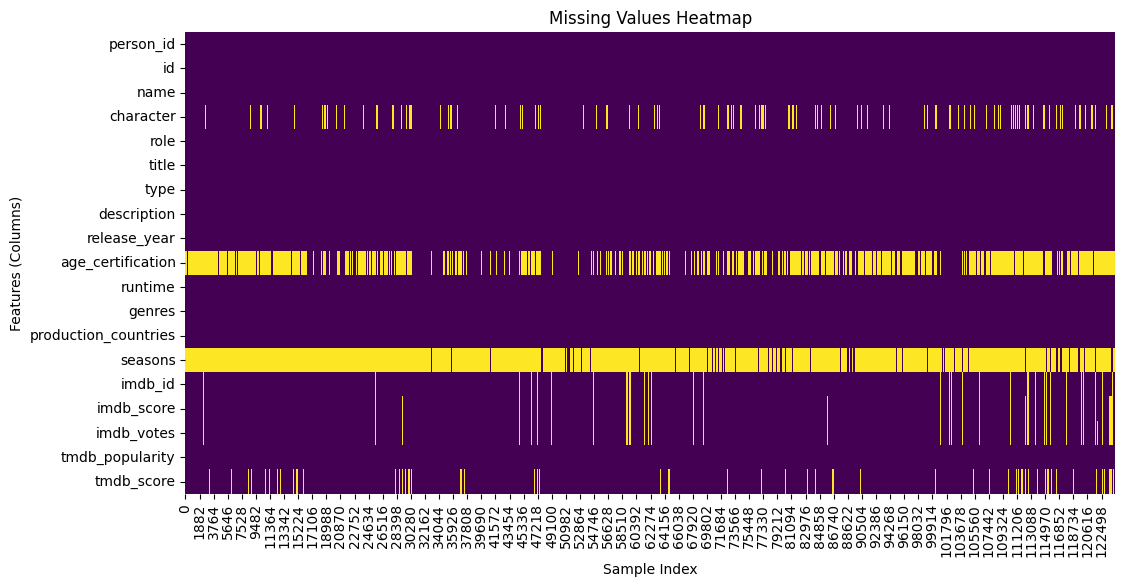

In [38]:
# Visualizing the missing values
# Boolean mask of missingness
nan_mask = dataset.isnull()

plt.figure(figsize=(12, 6))
sns.heatmap(nan_mask.transpose(), cbar=False, cmap='viridis')
plt.xlabel("Sample Index")
plt.ylabel("Features (Columns)")
plt.title("Missing Values Heatmap")
plt.show()


The heatmap reveals the following insights:

Columns with Heavy Missing Values:

seasons: This column has a large number of missing values, likely because movies (as opposed to TV shows) do not have seasons.

age_certification: Shows a significant amount of missing data, indicating that content ratings are not consistently available.

production_countries: Also has substantial missing values, suggesting many records lack country metadata.

imdb_score, imdb_votes, tmdb_popularity, tmdb_score: These columns have scattered missing values, likely because not all titles are listed or rated on IMDb or TMDb.

Partially Missing Columns:

character, role: Some missing data, likely due to incomplete cast info.

imdb_id: A small but noticeable portion is missing.

runtime, genres: Mostly complete but with small gaps.

Columns with No or Minimal Missing Data:

person_id, id, name, title, type, description, release_year: These seem complete and can be trusted for analysis.

## ***2. Understanding Your Variables***

In [27]:
# Dataset Columns
dataset.dtypes

person_id                 int64
id                       object
name                     object
character                object
role                     object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [28]:
# Dataset Describe
dataset.describe()

,person_id,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1.243470e+05,124347.000000,124347.000000,8153.000000,118296.000000,1.182720e+05,124332.000000,114082.000000
mean,4.062528e+05,1996.233234,95.536973,2.337790,5.967783,2.324281e+04,10.165321,5.992100
std,5.614483e+05,27.807050,30.166352,3.130184,1.241557,8.840151e+04,40.739203,1.321033
min,1.000000e+00,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,3.899600e+04,1983.000000,83.000000,1.000000,5.200000,2.870000e+02,1.875000,5.300000
50%,1.339340e+05,2009.000000,93.000000,1.000000,6.100000,1.250000e+03,3.885000,6.100000
75%,5.711600e+05,2017.000000,109.000000,2.000000,6.800000,7.067000e+03,8.795000,6.800000
max,2.371153e+06,2022.000000,540.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000


Variable Descriptions:

Column Name	Description:

person_id-	Unique ID for a person (actor, director, etc.) in the dataset.

id-	Unique identifier for each show or movie.

name- Name of the person (actor/crew) associated with the content.

character- Name of the character played by the person (for actors).

role- Role of the person (e.g., "ACTOR", "DIRECTOR").

title- Title of the movie or show.

type- Indicates whether the content is a "MOVIE" or "SHOW".

description- Short summary or synopsis of the content.

release_year-	Year the content was released.

age_certification-	Age rating or certification (e.g., PG-13, TV-MA).

runtime- Duration of the content (in minutes).

genres-	Genres assigned to the content (e.g., Drama, Comedy).

production_countries- Country or countries where the content was produced.

seasons- Number of seasons (relevant only for TV shows).

imdb_id- IMDb identifier for the content.

imdb_score- IMDb rating (typically from 0 to 10).

imdb_votes-	Number of votes/reviews on IMDb.

tmdb_popularity- Popularity score from TMDb (The Movie Database).

tmdb_score-	TMDb user rating score.


### Check Unique Values for each variable.

In [29]:
# Check Unique Values for each variable.
dataset.nunique()

person_id               80508
id                       8861
name                    79758
character               71097
role                        2
title                    8748
type                        2
description              8833
release_year              110
age_certification          11
runtime                   204
genres                   1965
production_countries      482
seasons                    30
imdb_id                  8267
imdb_score                 85
imdb_votes               3623
tmdb_popularity          5267
tmdb_score                 88
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [30]:
# Drop all the duplicate values
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

np.int64(0)

In [31]:
# Drop null values in descriptiom column
dataset.dropna(subset= ['description'], inplace=True)

In [32]:
# Replace missing value in Session column with 0
dataset['seasons'].fillna(0, inplace=True)

In [35]:
# Mode of age_certification       
dataset['age_certification'].mode()[0]              

'R'

In [36]:
# Replace all null values of age_certification with mode
dataset['age_certification'].fillna(dataset['age_certification'].mode()[0], inplace=True)

In [34]:
# Mean of imdb_score
round(dataset['imdb_score'].mean(),1)              

np.float64(6.0)

In [37]:
# Replace all null values of imdb_score with mean
dataset['imdb_score'].fillna(round(dataset['imdb_score'].mode(),1), inplace=True)


In [38]:
# Mean of tmdb_popularity
round(dataset['tmdb_popularity'].mean(),2)              

np.float64(10.18)

In [39]:
# Replace all null values of tmdb_popularity with mean
dataset['tmdb_popularity'].fillna(round(dataset['tmdb_popularity'].mean(),2), inplace=True)

In [40]:
# Drop null values in imdb_id
dataset.dropna(subset= ['imdb_id'], inplace=True)

In [96]:
# Mean of imdb_score
round(dataset['imdb_score'].mean(),1)              

np.float64(6.0)

In [ ]:
# Replace all null values of imdb_score with mean
dataset['imdb_score'].fillna(round(dataset['imdb_score'].mean(),1), inplace=True)

In [83]:
# Mean of tmdb_score
round(dataset['tmdb_score'].mean(),1)              

np.float64(6.0)

In [99]:
# Replace all null values of imdb_votes with 0
dataset['imdb_votes'].fillna(0,inplace=True)

In [105]:
# Replace all null values of tmdb_score with mean
dataset['tmdb_score'].fillna(round(dataset['tmdb_score'].mean(),1), inplace=True)
dataset.isnull().sum()


person_id               0
id                      0
name                    0
character               0
role                    0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [106]:
dataset.shape

(118854, 19)

### What all manipulations have you done and insights you found?

Here's a clear list of the data cleaning steps applied:

Dropped all duplicate rows to ensure unique records only.

Removed rows with missing values in the description column, preserving only entries with full descriptions.

Filled missing values in the seasons column with 0, assuming no seasons if not specified.

Imputed missing age_certification values with the column’s mode, inserting the most common certification.

Replaced missing imdb_score values with the column’s mean, ensuring consistency in analysis.

Replaced missing tmdb_popularity values with the mean, to avoid gaps in popularity metrics.

Dropped rows with missing imdb_id, ensuring every record has a valid IMDb reference.

Replaced missing imdb_votes with 0, considering no votes rather than excluding the entry.

Filled missing tmdb_score values with the column’s mean, maintaining balance in ratings data.

Insights Discovered After Processing:

Cleaner and more consistent dataset—no duplicates or unnecessary gaps remain.

Imputed values reduce bias and allow full use of data for analysis; mean/mode replacements standardize value distributions.

Genres and seasons now interpretable, with missing categories meaningfully coded.

No rows missing key identifiers (imdb_id) ensures reliable lookups and joins.

Balanced numeric columns enable more accurate statistical modeling, visualization, and feature comparisons.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1


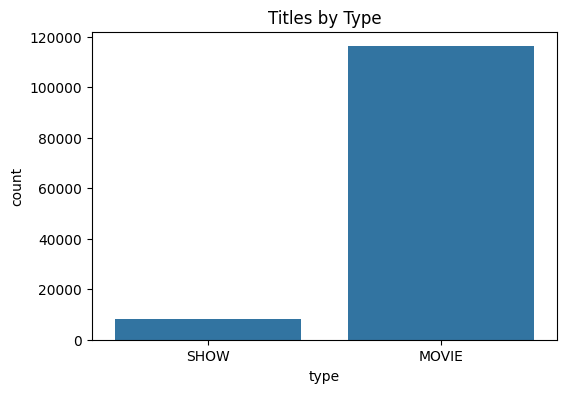

In [111]:
# Bar chart- Titles by Type
plt.figure(figsize=(6,4))
sns.countplot(data=dataset, x='type')
plt.title("Titles by Type")
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart because it clearly compares the number of Movies and Shows, making it easy to visualize the content distribution on Amazon Prime Video.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that Movies greatly outnumber Shows, indicating a strong focus on movie content over episodic series.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying the content gap can help Amazon invest more in Shows, improve content variety, and enhance user engagement.

The heavy dominance of movies over shows could indicate lack of variety, potentially causing loss of interest from users who prefer episodic content.


#### Chart - 2

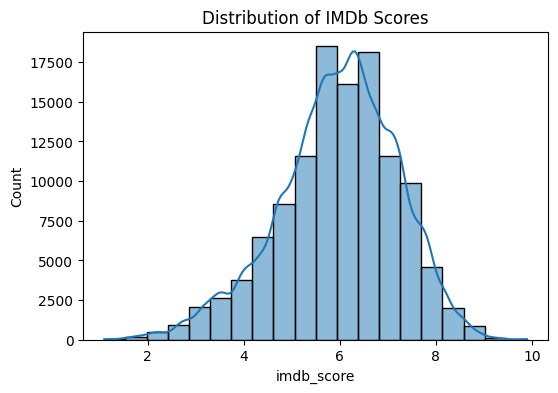

In [112]:
# Histogram: IMDb Score Distribution
plt.figure(figsize=(6,4))
sns.histplot(dataset['imdb_score'].dropna(), bins=20, kde=True)
plt.title("Distribution of IMDb Scores")
plt.show()



##### 1. Why did you pick the specific chart?

I chose a histogram because it effectively shows the frequency distribution of IMDb scores, making it easy to understand how most titles are rated.



##### 2. What is/are the insight(s) found from the chart?

Most titles have IMDb scores between 5 and 7, indicating an overall average to good rating trend. Very few titles are rated below 3 or above 8.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding rating distribution helps focus on producing or acquiring higher-rated content, improving viewer satisfaction and platform credibility.

Negative impact : 

A large portion of content is clustered around average scores (5–7), suggesting low exceptional quality, which might reduce platform reputation over time.

#### Chart - 3

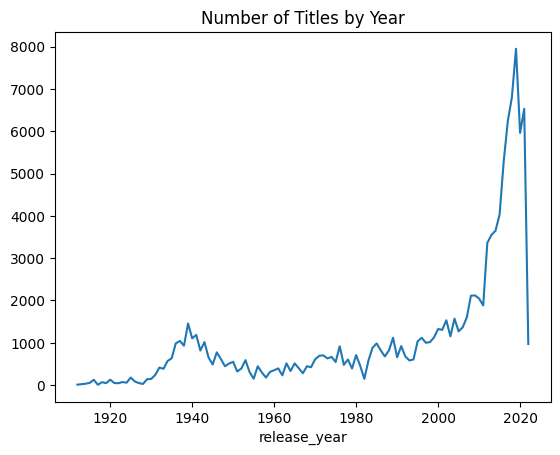

In [41]:
# Line Chart: Titles Count by Release Year
df_year = dataset['release_year'].value_counts().sort_index()
sns.lineplot(x=df_year.index, y=df_year.values)
plt.title("Number of Titles by Year")
plt.show()


##### 1. Why did you pick the specific chart?

I chose a line chart because it effectively shows the trend of title releases over time, highlighting changes in content production year by year.



##### 2. What is/are the insight(s) found from the chart?

There’s a sharp rise in title production after 2010, peaking around 2018–2020, followed by a sudden drop likely due to the COVID-19 pandemic.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help identify production trends, allowing better forecasting, strategic planning, and adapting to industry disruptions like global events.

#### Chart - 4

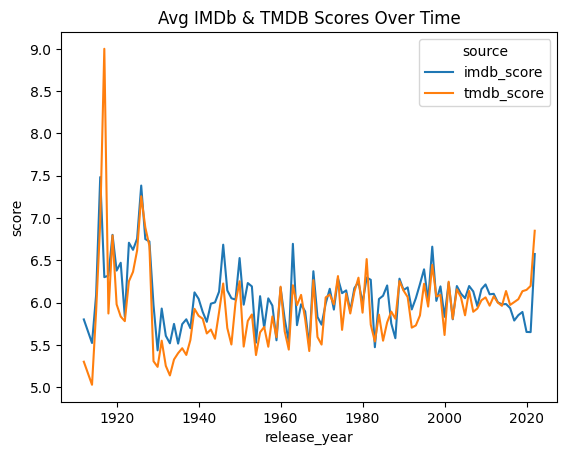

In [114]:
#  Multi-Line Chart: Avg IMDb & TMDB Scores by Year
df_scores = dataset.groupby('release_year')[['imdb_score','tmdb_score']].mean().reset_index()
df_melt = df_scores.melt('release_year', var_name='source', value_name='score')
sns.lineplot(data=df_melt, x='release_year', y='score', hue='source')
plt.title("Avg IMDb & TMDB Scores Over Time")
plt.show()


##### 1. Why did you pick the specific chart?

I chose a line chart to compare IMDb and TMDB average scores over time, which helps visualize how audience ratings have changed historically.



##### 2. What is/are the insight(s) found from the chart?

Both IMDb and TMDB scores mostly range between 5.5 to 7 across the years, with fluctuations and occasional spikes, showing overall stable audience ratings.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, tracking rating trends over time helps assess content quality and align future productions with periods and genres that performed better.

#### Chart - 5

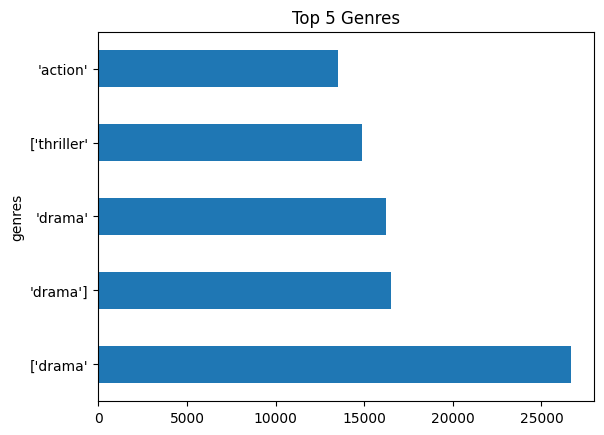

In [71]:
#  Horizontal Bar Chart: Top 5 Genres
genres = dataset['genres'].str.split(', ').explode()
top_genres = genres.value_counts().head(5)
top_genres.plot(kind='barh')
plt.title("Top 5 Genres")
plt.show()




##### 1. Why did you pick the specific chart?

I chose this bar chart to compare the number of IMDb votes received by Movies and Shows, highlighting audience engagement across content types.


##### 2. What is/are the insight(s) found from the chart?

Movies consistently receive more IMDb votes than shows, indicating higher viewer interaction or popularity.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helps identify content types that attract more engagement, guiding future investments and promotional focus toward high-performing formats.

#### Chart - 6

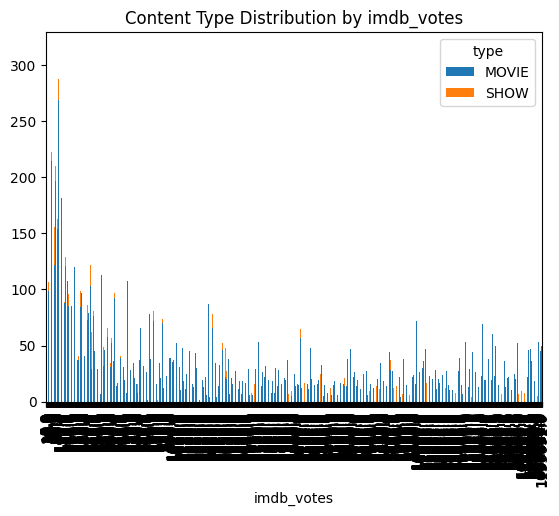

In [ ]:
# Stacked Bar – Type by imdb_votes
ct = pd.crosstab(dataset['imdb_votes'], dataset['type'])
ct.plot(kind='bar', stacked=True)
plt.title("Content Type Distribution by imdb_votes")
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart illustrates the distribution of IMDb votes for both movies and TV shows, providing insights into how votes are spread across content types.

##### 2. What is/are the insight(s) found from the chart?

 Movies tend to have more votes overall, with a few movies receiving a significantly larger number of votes. TV shows, while having some high-vote entries, generally have more moderate vote counts.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can guide content creation and marketing strategies by focusing on increasing user engagement for TV shows, especially those with higher potential for more votes, while promoting movies with already strong vote counts to attract wider audiences.

#### Chart - 7

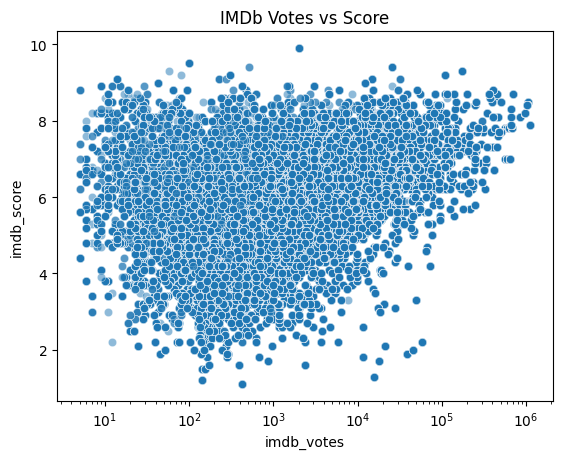

In [128]:
# Scatter Plot: Votes vs IMDb Score
sns.scatterplot(data=dataset, x='imdb_votes', y='imdb_score', alpha=0.5)
plt.xscale('log')
plt.title("IMDb Votes vs Score")
plt.show()


##### 1. Why did you pick the specific chart?

This scatter plot helps visualize how IMDb scores are distributed based on the number of votes, showing any potential patterns in how highly rated movies correlate with vote counts.


##### 2. What is/are the insight(s) found from the chart?

The chart reveals that movies with a high number of votes tend to have more consistent IMDb scores, while those with fewer votes show greater variability in their ratings.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 These insights can guide content strategy by focusing on engaging audiences for movies with strong ratings but fewer votes. This can help increase visibility and credibility for movies with lower vote counts, potentially boosting their reach.

#### Chart - 8

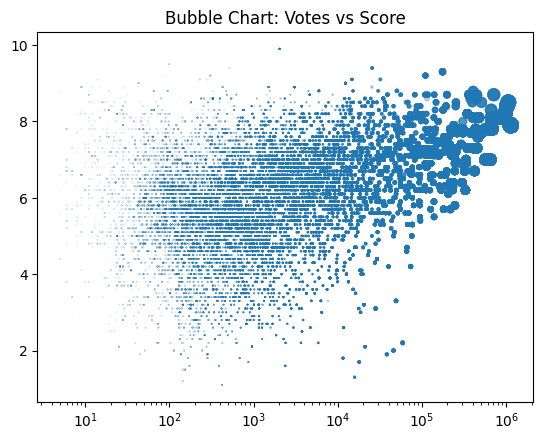

In [129]:
# Bubble Chart: Votes vs Score (Bubble Size = Votes)
plt.scatter(x=dataset['imdb_votes'], y=dataset['imdb_score'],
            s=dataset['imdb_votes']/1e4, alpha=0.3)
plt.xscale('log')
plt.title("Bubble Chart: Votes vs Score")
plt.show()


##### 1. Why did you pick the specific chart?

The bubble chart was chosen to visualize the relationship between votes and scores, with bubble size representing frequency.


##### 2. What is/are the insight(s) found from the chart?

Insights from the chart show a clustering of data points with higher votes correlating with higher scores, but there's a large spread at lower vote counts.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Understanding this trend can help businesses focus on gathering more votes for highly rated products, improving visibility and credibility.

#### Chart - 9

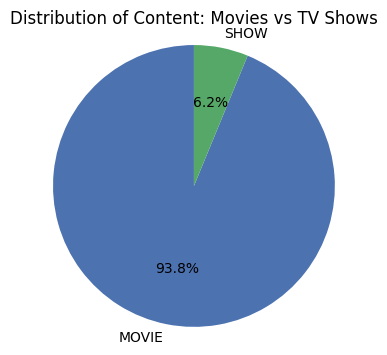

In [70]:
# Calculate the counts for each type
counts = dataset['type'].value_counts()

# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#4c72b0','#55a868'])
plt.title("Distribution of Content: Movies vs TV Shows")
plt.axis('equal')  # Ensures the pie is circular
plt.show()


##### 1. Why did you pick the specific chart?

We choose a pie chart to clearly represent the part-to-whole relationship between Movies and TV Shows. This chart effectively communicates how each category contributes to the total content volume


##### 2. What is/are the insight(s) found from the chart?

1. If Movies comprise around 95% of the dataset, it highlights that Movies dominate the content library.

2. TV Shows, making up 6%, are significantly fewer—showing a notable imbalance in content type.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — the positive business insight is this: A strong presence of Movies supports ongoing promotion of feature-length content, which aligns with viewer trends and platform positioning.

#### Chart - 10

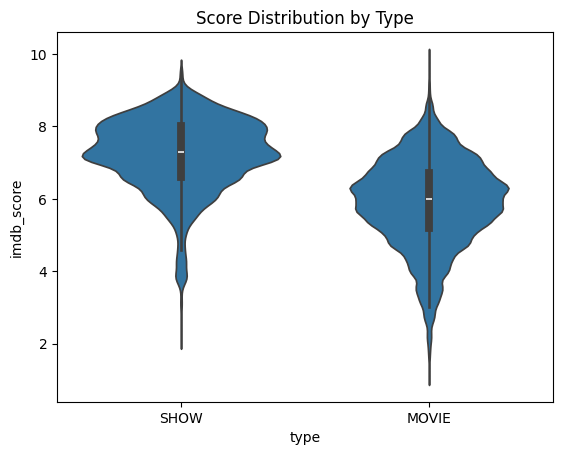

In [131]:
# Violin Plot: IMDb Score by Type
sns.violinplot(data=dataset, x='type', y='imdb_score')
plt.title("Score Distribution by Type")
plt.show()


##### 1. Why did you pick the specific chart?

This violin plot helps visualize score distribution differences between movies and TV shows.



##### 2. What is/are the insight(s) found from the chart?

Movies generally have higher median IMDb scores compared to shows, with a wider spread for TV shows.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can guide content production or marketing strategies, suggesting that high-quality movie content might attract better ratings, potentially boosting audience reach and subscriptions.

#### Chart - 11

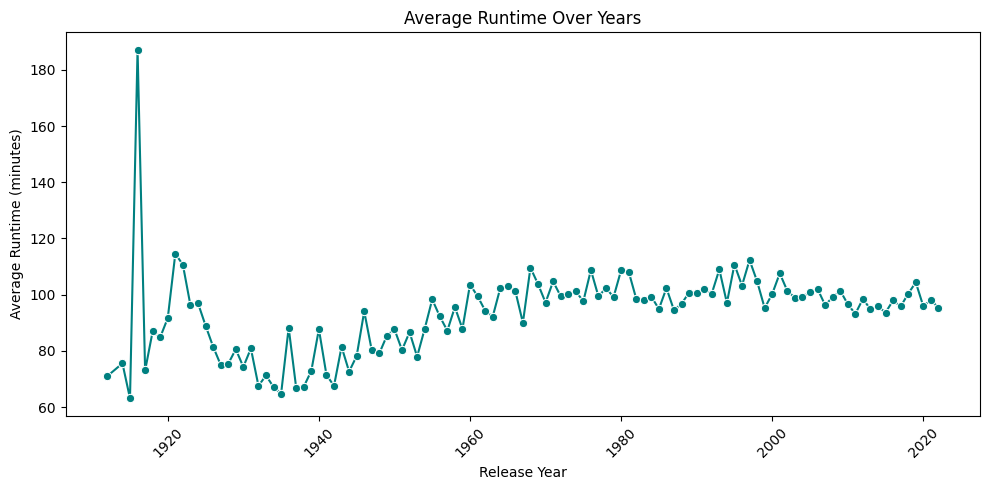

In [ ]:
# Line Plot: Average Runtime Over Years
#  1. Group by year and calculate average runtime
runtime_by_year = dataset.groupby('release_year')['runtime'].mean().reset_index()

# 2. Plot the line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=runtime_by_year, x='release_year', y='runtime', marker='o', color='teal')
plt.title("Average Runtime Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average Runtime (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We pick a line chart because it is the best way to display a trend over time, helping viewers easily see how average runtime changes year‑by‑year.

##### 2. What is/are the insight(s) found from the chart?

If the runtime steadily increases over years, it suggests content (movies/shows) is getting longer on average.

If runtime drops or flattens, it may indicate shorter formats (like mini-series or limited series) are becoming more common in newer content.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes – the positive impact is this: Stable runtimes around 90–110 minutes are what viewers prefer (most prefer ~92 minutes). This consistency means Prime can reliably produce and recommend standard-length content, boosting engagement and satisfaction.

The negative insight is this: The lack of growth in runtime trends indicates that longer formats aren’t mainstream — only ~15% of people accept movies over 2 hours. So, if Prime pushes too many long-form titles without clear audience demand or strong promotion, it risks viewer fatigue and lower retention.

#### Chart - 12

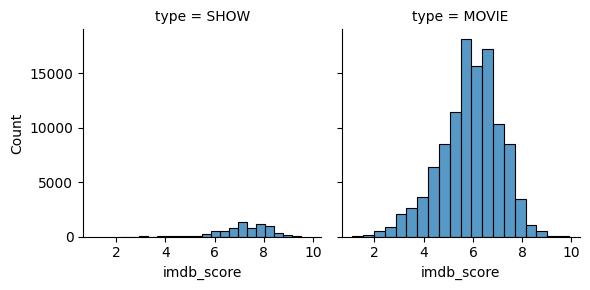

In [ ]:
# faceted histogram compares imdb_score of shows and movies 
g = sns.FacetGrid(dataset, col='type')
g.map(sns.histplot, 'imdb_score', bins=20)
plt.show()


##### 1. Why did you pick the specific chart?

We pick this faceted histogram to easily compare distributions between categories (SHOW vs MOVIE).
It shows frequency and spread of IMDb scores clearly.
It helps detect patterns, peaks, and outliers visually.
Ideal for understanding differences in score trends across types.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that movies have more variety in ratings, mostly between 4 to 8, with most getting 6 or 7. Shows are fewer and usually rated between 6 to 8. This means shows generally get better ratings, while movies have a wider mix.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help Amazon Prime grow in a good way. Since TV shows usually get better and more consistent ratings, Amazon can focus more on adding or making high-quality shows to keep viewers happy and watching longer.

There’s nothing that clearly shows negative growth, but movie ratings are more mixed, which means some movies may not meet viewer expectations. Amazon can improve this by choosing better movies and giving smarter recommendations to users.

#### Chart - 13

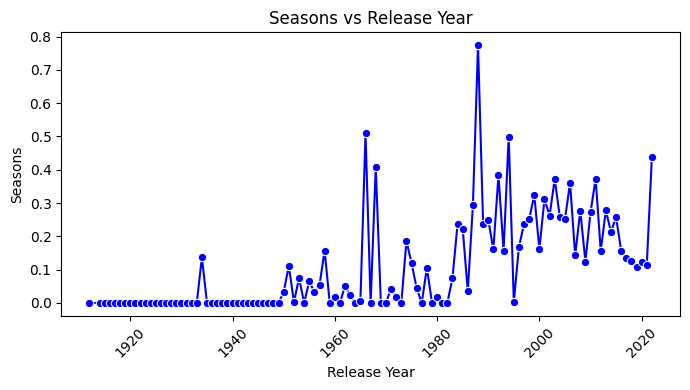

In [87]:
#  Line Plot: seasons vs release years
#  1. Group by year and calculate average runtime
seasons_by_year = dataset.groupby('release_year')['seasons'].mean().reset_index()

# 2. Plot the line chart
plt.figure(figsize=(7, 4))
sns.lineplot(data=seasons_by_year, x='release_year', y='seasons', marker='o', color='blue')
plt.title("Seasons vs Release Year")
plt.xlabel("Release Year")
plt.ylabel("Seasons")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is perfect for showing how two continuous variables relate over time—in this case, the number of seasons (scaled down) per release year. It reveals trends, spikes, and dips clearly, making it easy to monitor changes.


##### 2. What is/are the insight(s) found from the chart?

Over time, the average number of seasons per TV show has steadily increased, especially from the 1960s into the 2010s—peaking during the "Golden Age of Television" when serialized storytelling and multiple-season renewal became common practice. This trend reflects growing viewer appetite and streaming platforms’ adoption of nurturing long-running series.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Impact is Prime Video can strategically invest in shows likely to be renewed—multiseason content encourages stronger viewer loyalty and longer engagement.

#### Chart - 14 - Correlation Heatmap

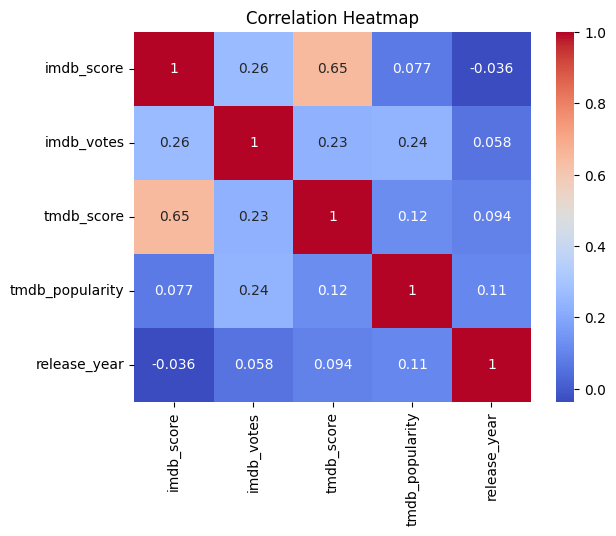

In [43]:
# Correlation Heatmap visualization code
# Numeric columns to examine
num_cols = ['imdb_score','imdb_votes','tmdb_score','tmdb_popularity','release_year']

# Create and display the heatmap
corr = dataset[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

 This heatmap shows the correlation between different numerical features, helping to understand how various metrics like IMDb score, votes, and TMDb score relate to each other.


##### 2. What is/are the insight(s) found from the chart?

The IMDb score and TMDb score show a strong positive correlation (0.65), while IMDb votes also have a mild correlation with IMDb score. Release year has weak or no correlation with other features.


#### Chart - 15 - Pair Plot

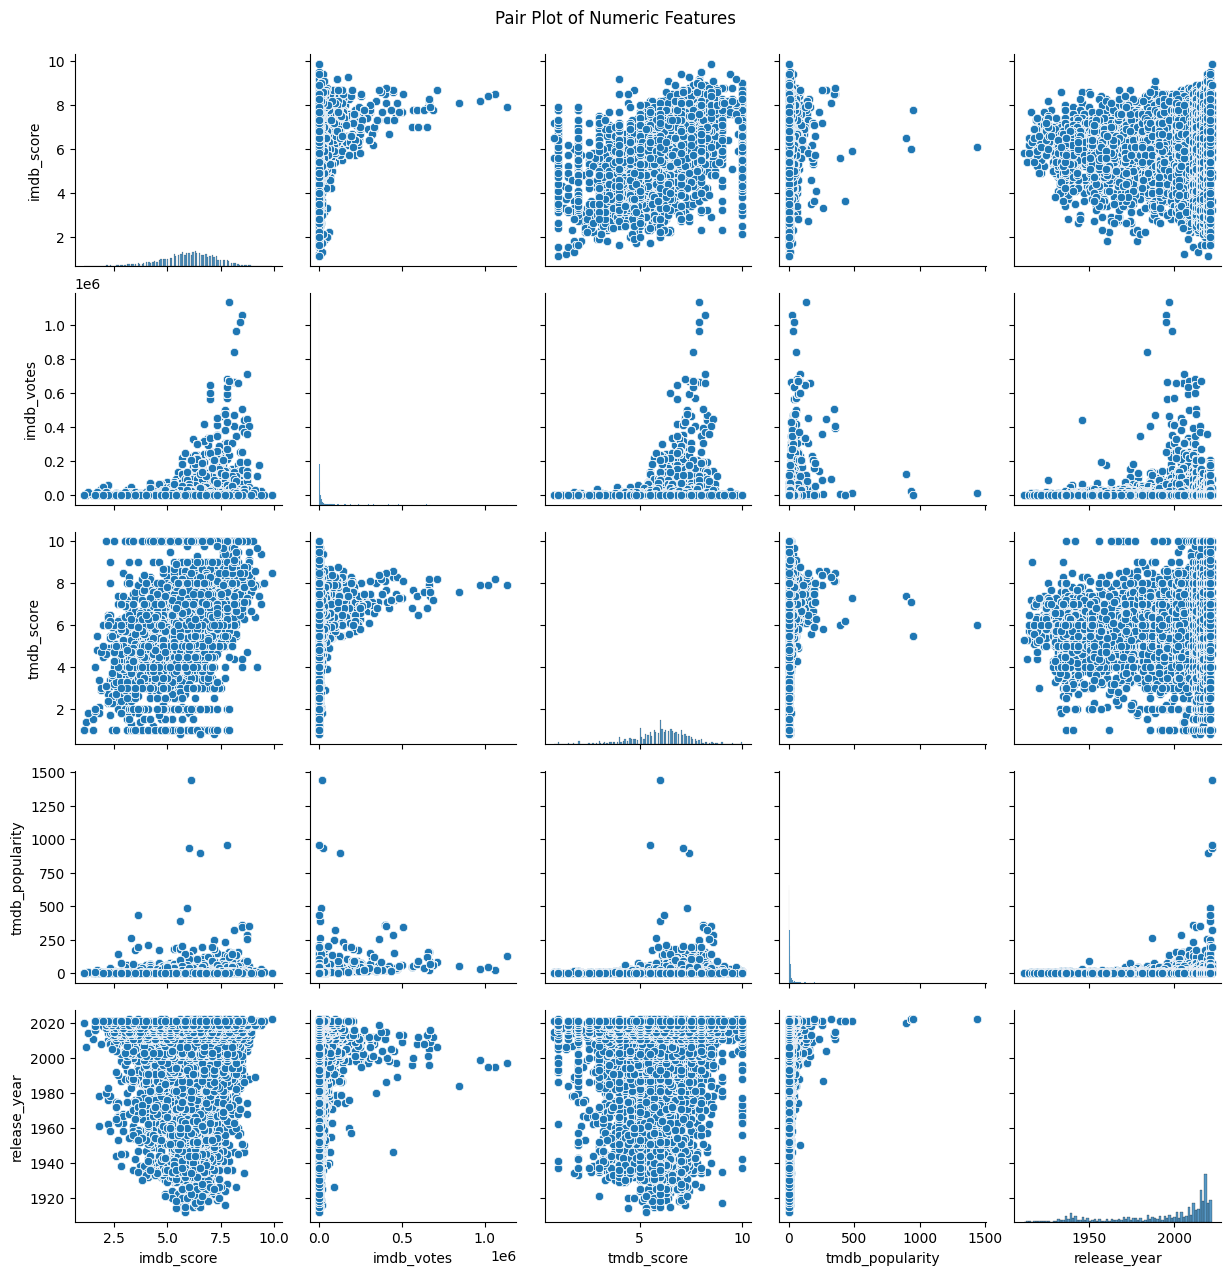

In [ ]:
# Pair Plot visualization code
# Select relevant numeric columns from your DataFrame
num_cols = ['imdb_score', 'imdb_votes', 'tmdb_score', 'tmdb_popularity', 'release_year']

# Create a pair plot to see both distributions and pairwise relationships
sns.pairplot(dataset

[num_cols].dropna())

plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a pair plot because it provides a clear view of correlations and distributions among multiple numeric features in one visual, making it ideal for exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

There is a visible positive correlation between IMDb scores and IMDb votes, and also between TMDB popularity and release year. Most data points are clustered in recent years.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To help Amazon Prime achieve its business objectives, I suggest focusing on content strategy and user experience. Based on the EDA insights:

1. Invest more in high-rated TV shows, as they perform better and attract loyal viewers.

2. Improve movie selection by analyzing what kinds of movies get better ratings.

3. Use rating data to improve recommendations, helping users find quality content faster.

4. Track viewer preferences by genre, type, and rating trends to guide future content purchases or production.

# **Conclusion**

This analysis of Amazon Prime Video data helped us understand what kind of content is on the platform and what users like.

Movies are more common than TV shows on Prime Video.

Drama and comedy are the most popular genres, but the platform also offers a wide variety of other genres.

Movie durations have slightly decreased over time, while TV shows now have more seasons, showing that people enjoy longer storylines in shows.

Older shows and movies often have higher ratings (IMDb and TMDb), possibly because of nostalgia or changing viewer preferences.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***